# Introduction

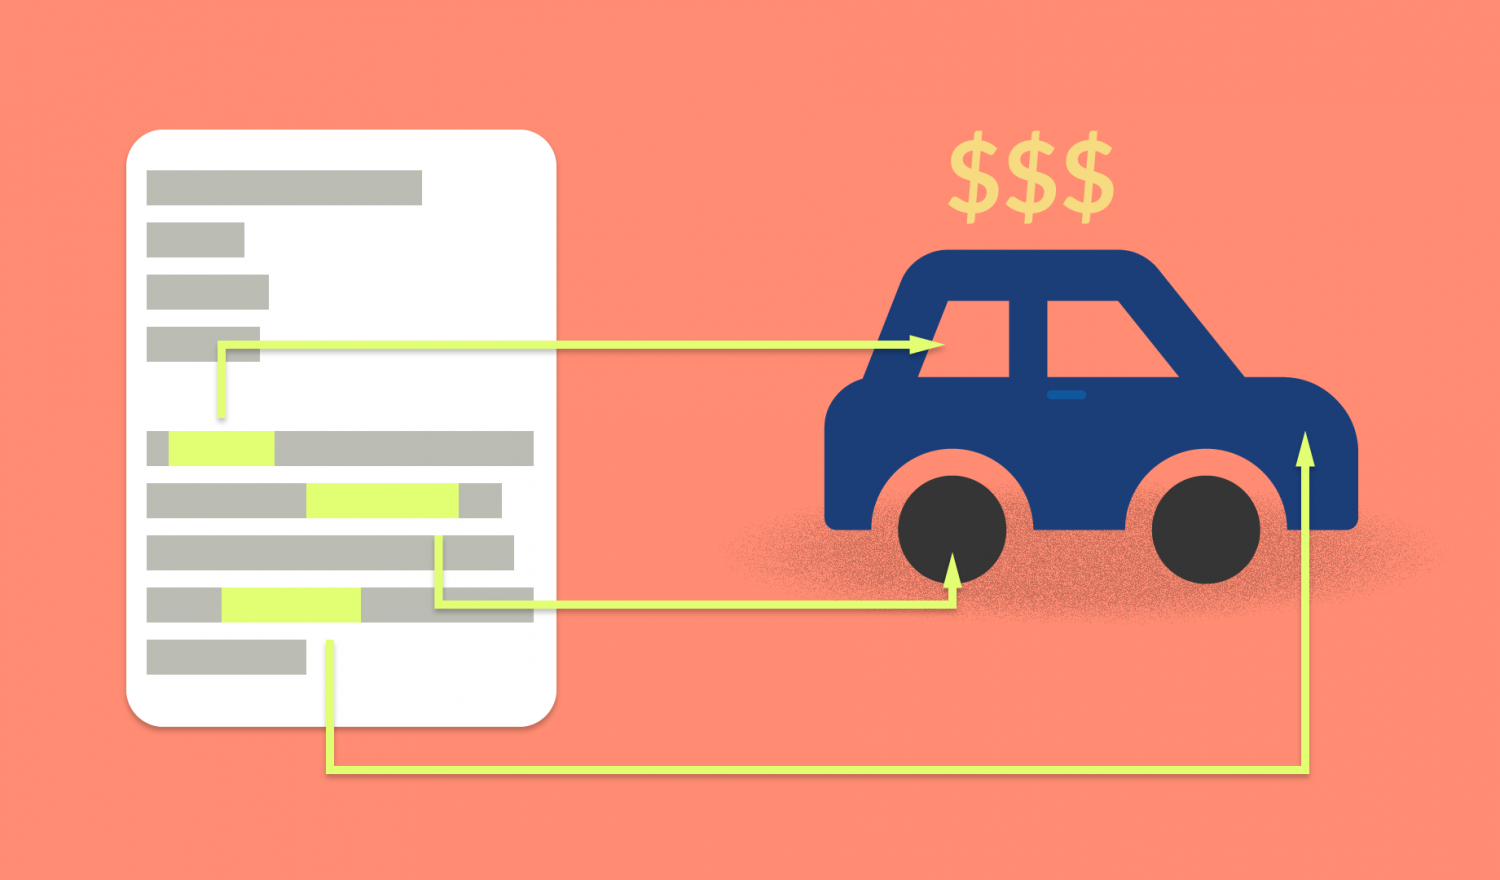

In this project, we explore the fundamentals of machine learning using the k-nearest neighbors (KNN) algorithm for univariate and multivariate models. We will apply hyperparameter optimization for each model. In addition, we will also apply various cross-validation methods to assess the performance of a machine learning model. 

For the purpose if this project we will first apply 50/50 train/test holdout validation which is actually a specific example (where k = 2) of a larger class of validation techniques called k-fold cross-validation. Following that we will apply k-fold cross validation where k = a range between 3 and 23.

The 50/50 holdout validation has the drawback of utilizing only half of the available data for training. However, using it can help prevent bias towards a specific subset of the data. Holdout validation K-fold cross validation, on the other hand, takes advantage of a larger proportion of the data during training while still rotating through different subsets of the data to avoid the issues of train/test validation.

It's important to note that the choice of a particular validation method depends on the context and the specific requirements of the analysis. While holdout validation allows for an initial assessment of a model's performance, more advanced techniques, such as cross-validation, are often employed to maximize the use of the available data while ensuring an unbiased evaluation of the model's performance. These methods help strike a balance between using the data effectively for training and evaluating the model's generalization capabilities on unseen data.

The project will be carried out in the following sequence of steps:
- Introducing the Dataset
- Data preparation & Normalization
- Univariate k-nearest neighbors model
- Multivariate k-nearest neighbors model
- Adjusting the model for k-fold cross validation
- Conclusion 


# Introducing the Dataset

We will practice the machine learning workflow to predict a car's market price using its attributes. The data set we will be working with contains information on various cars. For each car we have information about the technical aspects of the vehicle such as the motor's displacement, the weight of the car, the miles per gallon, how fast the car accelerates, and more. You can read more about the data set __[here](https://archive.ics.uci.edu/dataset/10/automobile)__ and can download it directly from __[here](https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data)__.

In [1]:
import pandas as pd
import numpy as np

In [2]:
column_names = ['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration', 
               'num_doors', 'body_style', 'drive_wheels', 'engine_location', 'wheel_base', 'length', 'width', 
               'height', 'curb_weight', 'engine_type', 'num_cylinders', 'engine_size', 'fuel_system', 
               'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price']
cars = pd.read_csv('imports-85.data', names = column_names)

In [3]:
pd.set_option('display.max_columns', None) # display all columns for the data set 
cars.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [4]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized_losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel_type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num_doors          205 non-null    object 
 6   body_style         205 non-null    object 
 7   drive_wheels       205 non-null    object 
 8   engine_location    205 non-null    object 
 9   wheel_base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine_type        205 non-null    object 
 15  num_cylinders      205 non-null    object 
 16  engine_size        205 non

We need to determine which columns can be used as features. First option is to select numeric only columns. 

In [5]:
numeric_columns = cars.select_dtypes(include=['float64', 'int64']).columns.to_list()
numeric_columns

['symboling',
 'wheel_base',
 'length',
 'width',
 'height',
 'curb_weight',
 'engine_size',
 'compression_ratio',
 'city_mpg',
 'highway_mpg']

Upon examining the data set we can see that some columns contain numeric values despite being 'object' type. We should add them to our set too. 

In [6]:
feature_columns = ['normalized_losses', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_size', 'bore',
                   'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price']
feature_columns

['normalized_losses',
 'wheel_base',
 'length',
 'width',
 'height',
 'curb_weight',
 'engine_size',
 'bore',
 'stroke',
 'compression_ratio',
 'horsepower',
 'peak_rpm',
 'city_mpg',
 'highway_mpg',
 'price']

In [7]:
cars_nums = cars[feature_columns]
cars_nums.head()

,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450


# Data preparation & Normalization

In [8]:
# Removing '?' converting to numpy array
cars_nums = cars_nums.replace('?', np.nan)
cars_nums.head()

,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,NaN,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450


In [9]:
cars_nums = cars_nums.astype('float')
cars_nums.isnull().sum()

normalized_losses    41
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_size           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

We should remove any rows with missing values from the 'price' column, because this is the target values we need to predict.

In [10]:
cars_nums = cars_nums.dropna(subset=['price'])
cars_nums.isnull().sum()

normalized_losses    37
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_size           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 0
dtype: int64

Let's replace the missing values using the average values from that column.

In [11]:
cars_nums = cars_nums.fillna(cars_nums.mean())
cars_nums

,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,122.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,122.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,122.0,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,164.0,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,164.0,99.4,176.6,66.4,54.3,2824.0,136.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,95.0,109.1,188.8,68.9,55.5,2952.0,141.0,3.78,3.15,9.5,114.0,5400.0,23.0,28.0,16845.0
201,95.0,109.1,188.8,68.8,55.5,3049.0,141.0,3.78,3.15,8.7,160.0,5300.0,19.0,25.0,19045.0
202,95.0,109.1,188.8,68.9,55.5,3012.0,173.0,3.58,2.87,8.8,134.0,5500.0,18.0,23.0,21485.0
203,95.0,109.1,188.8,68.9,55.5,3217.0,145.0,3.01,3.40,23.0,106.0,4800.0,26.0,27.0,22470.0


In [12]:
cars_nums.isnull().sum() # verifying results

normalized_losses    0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_size          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

Now we should normalize values  in each column to the standard normal distribution so all values range from 0 to 1.

Normalization is a specific preprocessing technique used to rescale the features in a dataset to have similar ranges or scales. It's particularly important when features have different units or magnitudes. The goal is to ensure that no single feature dominates the learning process simply due to its larger values.

We will apply min-max scaling which scales the data to a specified range (typically [0, 1]) while preserving the data's original distribution. It is less affected by outliers and does not assume any particular distribution.

In [13]:
price_col = cars_nums['price']
cars_norm = (cars_nums - cars_nums.min()) / (cars_nums.max() - cars_nums.min())
cars_norm['price'] = price_col
cars_norm

,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.12500,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.12500,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.100000,0.666667,0.12500,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.181132,0.464286,0.633333,0.18750,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.283019,0.464286,0.633333,0.06250,0.313084,0.551020,0.138889,0.157895,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.157068,0.655977,0.711940,0.735043,0.641667,0.567882,0.301887,0.885714,0.514286,0.15625,0.308411,0.510204,0.277778,0.315789,16845.0
201,0.157068,0.655977,0.711940,0.726496,0.641667,0.605508,0.301887,0.885714,0.514286,0.10625,0.523364,0.469388,0.166667,0.236842,19045.0
202,0.157068,0.655977,0.711940,0.735043,0.641667,0.591156,0.422642,0.742857,0.380952,0.11250,0.401869,0.551020,0.138889,0.184211,21485.0
203,0.157068,0.655977,0.711940,0.735043,0.641667,0.670675,0.316981,0.335714,0.633333,1.00000,0.271028,0.265306,0.361111,0.289474,22470.0


# Univariate k-nearest neighbors model

Let's create a function that encapsulates the training and simple validation process based on one feature at a time.

In [14]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(feature_columns, target_column, df):

    #shuffling the data
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index) 
    rand_df = df.reindex(shuffled_index)

    #splitting the full dataset into 2 partitions for cross validation
    last_train_row = int(len(rand_df)/2)
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]

    #fitting and predicting the model on one feature only
    knn = KNeighborsRegressor()
    knn.fit(train_df[[feature_columns]], train_df[target_column])
    predictions = knn.predict(test_df[[feature_columns]])

    #calculating Root Mean Square Error
    rmse = mean_squared_error(test_df[target_column], predictions) ** 0.5
    return rmse

Now we should create a list of feature columns to use our function to train  and test univariate models. However, prior to that we must drop the 'price' column from the list of columns, as it is our target variable.

In [15]:
feature_columns = cars_norm.columns.drop('price')
feature_columns

Index(['normalized_losses', 'wheel_base', 'length', 'width', 'height',
       'curb_weight', 'engine_size', 'bore', 'stroke', 'compression_ratio',
       'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg'],
      dtype='object')

Now we should use for loop to train and test univariate models using the different numeric columns in the data set.

In [16]:
rmse_results = {}
for column in feature_columns:
    rmse_val = knn_train_test(column, 'price', cars_norm)
    rmse_results[column] = rmse_val

In [17]:
#arranging results as one-dimensional ndarray
pd.Series(rmse_results).sort_values()

engine_size          3271.201399
horsepower           3998.452040
curb_weight          4410.757785
width                4619.368133
city_mpg             5089.138311
highway_mpg          5180.535835
length               5419.972211
wheel_base           5465.236829
compression_ratio    6276.684871
bore                 6760.263778
peak_rpm             7373.272378
height               7592.144535
normalized_losses    7627.705962
stroke               8371.272109
dtype: float64

### Optimizing the model by hyperparameter tuning

Values that affect the behavior and performance of a model that are unrelated to the data that's used are referred to as **hyperparameters**. As the result the process of finding the optimal hyperparameter value is known as [hyperparameter optimization](https://en.wikipedia.org/wiki/Hyperparameter_optimization). A simple but common hyperparameter optimization technique is known as **grid search** which involves:

- selecting a subset of the possible hyperparameter values,
- training a model using each of these hyperparameter values,
- evaluating each model's performance,
- selecting the hyperparameter value that resulted in the lowest error value.

Now we will modify our function to follow the above steps and select various parameters for the k value.

In [18]:
def knn_train_test(feature_columns, target_column, df):

    #shuffling the data
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index) 
    rand_df = df.reindex(shuffled_index)

    #splitting the full dataset into 2 partitions for cross validation
    last_train_row = int(len(rand_df)/2)
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]

    #a list of k values to apply in our function
    k_values = [1, 3, 5, 7, 9]
    k_rmse = {} # empty dictionary where k values will be our keys and rmse results will be our values

    #amending for loop to add n_neighbors parameter  
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors = k)
        knn.fit(train_df[[feature_columns]], train_df[target_column])
        predictions = knn.predict(test_df[[feature_columns]])

        rmse = mean_squared_error(test_df[target_column], predictions) ** 0.5
        k_rmse[k] = rmse    
    return k_rmse

#creating another for loop to apply knn_train_test function with various k values on al feature columns
rmse_results = {} #new nested dictionary
for column in feature_columns:
    rmse_val = knn_train_test(column, 'price', cars_norm)
    rmse_results[column] = rmse_val

rmse_results

{'normalized_losses': {1: 9280.94986710108,
  3: 6961.106163204347,
  5: 7627.705962288315,
  7: 7465.485034880281,
  9: 7720.068716566579},
 'wheel_base': {1: 4627.561273136604,
  3: 5121.630694446549,
  5: 5465.236829414088,
  7: 5507.5301610837805,
  9: 5752.08271403299},
 'length': {1: 5169.802314431087,
  3: 5215.57978375828,
  5: 5419.972211210776,
  7: 5300.668415477293,
  9: 5381.824915148057},
 'width': {1: 4718.212860189694,
  3: 4616.675183893205,
  5: 4619.368133208157,
  7: 4599.589728952111,
  9: 4654.512440739093},
 'height': {1: 7745.61191262447,
  3: 8041.040589866264,
  5: 7592.144534847831,
  7: 7720.696298574056,
  9: 7718.878210213232},
 'curb_weight': {1: 5520.943644230783,
  3: 5038.26321442437,
  5: 4410.7577852337345,
  7: 4367.457694896477,
  9: 4631.20477413208},
 'engine_size': {1: 3201.3594590640105,
  3: 2835.030228999319,
  5: 3271.2013993711125,
  7: 3609.823267842287,
  9: 3724.2100786361966},
 'bore': {1: 9618.718150121935,
  3: 7454.3205773985255,
  5

Let's visualize our results with the line and scatter plots. 

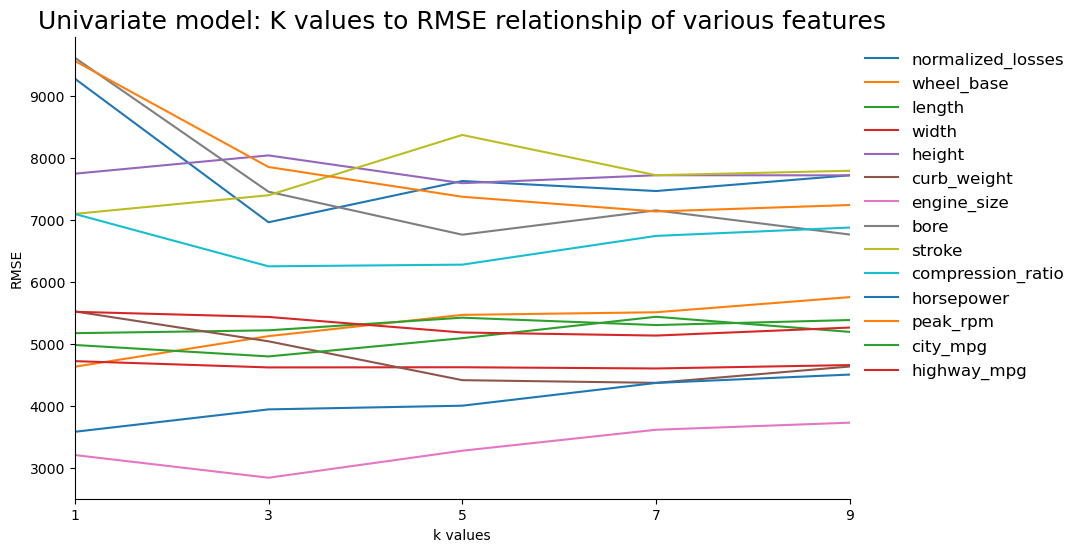

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(10,6))
for k, v in rmse_results.items():
    x = list(v.keys()) #extracting keys from nested dictionary
    y = list(v.values()) #extracting values from nested dictionary

    
    plt.plot(x,y, label = k)
    plt.xlabel('k values')
    plt.ylabel('RMSE')
    plt.xticks([1,3,5,7,9])
    plt.title('Univariate model: K values to RMSE relationship of various features', fontsize =18)
    plt.legend( fontsize = 12, ncols = 1, frameon=False, bbox_to_anchor=(1,1))
    plt.xlim(1,9)
    sns.despine()

plt.show()

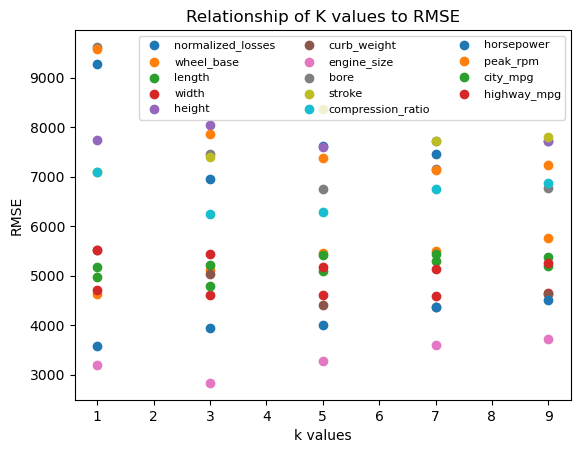

In [20]:
for k, v in rmse_results.items():
    x = list(v.keys()) #extracting keys from nested dictionary
    y = list(v.values()) #extracting values from nested dictionary

    plt.scatter(x,y, label = k)
    plt.xlabel('k values')
    plt.ylabel('RMSE')
    plt.title('Relationship of K values to RMSE')
    plt.legend(loc = 1, fontsize = 8,  ncols = 3)


plt.show()

As we can see in our case the line plot is more visually appealing rather than scatter plot.

# Multivariate k-nearest neighbors model

For the purpose of this exercise let's modify the function to accept a list of column names (instead of just a string). 

Before we can create multivariate model we need to identify best performing features. For this task we should compute average Root Mean Square Error (RMSE) across different k values for each feature.

In [21]:
feature_av = {}
for k, v in rmse_results.items():
    avg_rmse = np.mean(list(v.values()))
    feature_av[k] = avg_rmse

feature_av_sorted = pd.Series(feature_av).sort_values() #converting to pandas Series and sorting the results
print(feature_av_sorted)
feature_av_sorted = feature_av_sorted.index # extracting the index labels from the pandas Series

engine_size          3328.324887
horsepower           4076.233834
width                4641.671669
curb_weight          4793.725423
city_mpg             5097.581440
wheel_base           5294.808334
length               5297.569528
highway_mpg          5303.818305
compression_ratio    6647.668952
bore                 7549.913081
stroke               7675.790929
height               7763.674309
normalized_losses    7811.063149
peak_rpm             7833.873154
dtype: float64


### Modifying the function for Multivariate Model


Let's modify the knn_train_test() function we wrote in the last step to work with multiple columns.

First we will use best 2 features from the previous step to train and test a multivariate k-nearest neighbors model using the default k value. Then we use the best 3 columns, then 4 and so on up until 6th column.  

In [22]:
def knn_train_test(feature_columns, target_column, df):

    #shuffling the data
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index) 
    rand_df = df.reindex(shuffled_index)

    #splitting the full dataset into 2 partitions for cross validation
    last_train_row = int(len(rand_df)/2)
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]

    k_vals = [5] #creating a list with default k value
    k_rmse = {} # empty dictionary where k values will be our keys and rmse results will be our values 
    
    for k in k_vals:
        knn = KNeighborsRegressor(n_neighbors = k)
        knn.fit(train_df[feature_columns], train_df[target_column])
        predictions = knn.predict(test_df[feature_columns])

        #calculating Root Mean Square Error
        rmse = mean_squared_error(test_df[target_column], predictions) ** 0.5
        k_rmse[k] = rmse
        
    return k_rmse

rmse_results = {}

# looping through the best 6 features
for num_best_feat in range(2,7):
    rmse_results['{} best features'.format(num_best_feat)] = knn_train_test(
        feature_av_sorted[:num_best_feat], 'price', cars_norm)


rmse_results = sorted(rmse_results.items(), key = lambda x: x[1][5]) #sorting nested dictionary
rmse_results

[('2 best features', {5: 2955.187607386625}),
 ('5 best features', {5: 3360.832156381264}),
 ('4 best features', {5: 3487.563298747749}),
 ('3 best features', {5: 3567.456573132758}),
 ('6 best features', {5: 3667.4622629683636})]

### Hyperparameter Optimization

Let's use the grid search technique by selecting k values as range between 1 and 25 and train the model using those values. 

In [23]:
def knn_train_test(feature_columns, target_column, df):

    #shuffling the data
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index) 
    rand_df = df.reindex(shuffled_index)

    #splitting the full dataset into 2 partitions for cross validation
    last_train_row = int(len(rand_df)/2)
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]

    k_vals = [i for i in range(1,25)] #creating a range of k values between 1 and 25
    k_rmse = {} # empty dictionary where k values will be our keys and rmse results will be our values 
    
    for k in k_vals:
        knn = KNeighborsRegressor(n_neighbors = k)
        knn.fit(train_df[feature_columns], train_df[target_column])
        predictions = knn.predict(test_df[feature_columns])

        #calculating Root Mean Square Error
        rmse = mean_squared_error(test_df[target_column], predictions) ** 0.5
        k_rmse[k] = rmse
        
    return k_rmse

final_rmse_results = {}

# looping through the best 6 features
for num_best_feat in range(2,6):
    final_rmse_results[f'{(num_best_feat)} best features'] = knn_train_test(
        feature_av_sorted[:num_best_feat], 'price', cars_norm)

#rmse_results = pd.Series(rmse_results).sort_values()
final_rmse_results


{'2 best features': {1: 2450.2738763874804,
  2: 2661.9987126292162,
  3: 2793.550528548849,
  4: 2864.739225449104,
  5: 2955.187607386625,
  6: 3051.3008413228326,
  7: 3161.8029926093677,
  8: 3447.870716189476,
  9: 3788.4717994509742,
  10: 4076.9610506254326,
  11: 4185.068696931529,
  12: 4287.774725087223,
  13: 4379.380419432107,
  14: 4422.510853684792,
  15: 4532.435214548731,
  16: 4681.2635642500345,
  17: 4735.980331009335,
  18: 4790.924284707802,
  19: 4842.8352741445615,
  20: 4839.872589219291,
  21: 4839.343451354248,
  22: 4828.464675627526,
  23: 4860.8210277333355,
  24: 4902.3076518997805},
 '3 best features': {1: 3312.80766028748,
  2: 3496.1531741796916,
  3: 3339.0545523591495,
  4: 3359.448815514147,
  5: 3567.456573132758,
  6: 3719.8643263478903,
  7: 3645.5786538155767,
  8: 3744.921304333344,
  9: 3984.367185540151,
  10: 3994.924521449587,
  11: 4127.333398712259,
  12: 4272.235062338452,
  13: 4348.726710239621,
  14: 4325.585813432624,
  15: 4397.66973

Let's visualize the results

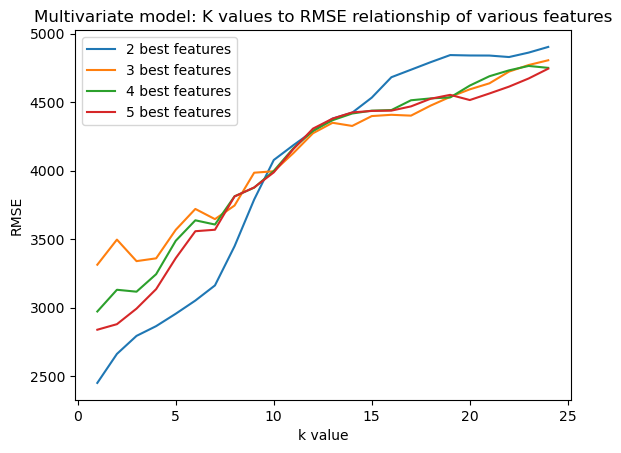

In [24]:
for k,v in final_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())  
    plt.plot(x,y, label="{}".format(k))
    
plt.xlabel('k value')
plt.ylabel('RMSE')
plt.legend()
plt.title("Multivariate model: K values to RMSE relationship of various features")
plt.show()

# Adjusting the model for k-fold cross validation

50/50 holdout validation has the drawback of utilizing only half of the available data for training. K-fold cross validation, on the other hand, takes advantage of a larger proportion of the data during training while still rotating through different subsets of the data to avoid the issues of train/test validation.

A model has two sources of error, bias and variance. **Bias** describes error that results in bad assumptions about the learning algorithm. **Variance** describes error that occurs because of the variability of a model's predicted values. The standard deviation of the RMSE values can be a proxy for a model's variance while the average RMSE is a proxy for a model's bias. Bias and variance are the two observable sources of error in a model that we can indirectly control.

Now we will modify the knn_train_test() function to use k-fold cross validation instead of test/train holdout validation. We will calculate average RMSE and standard deviation of RMSE across all the folds using default k value.

In [25]:
from sklearn.model_selection import cross_val_score, KFold

num_folds = [3, 5, 7, 9, 10, 11, 13, 15, 17, 19, 21, 23]

avg_rmse_list = []
std_rmse_list = []

for fold in num_folds:
    kf = KFold(fold, shuffle=True, random_state=1)
    model = KNeighborsRegressor()
    mses = cross_val_score(model, cars_norm[feature_columns], cars_norm["price"], scoring="neg_mean_squared_error", cv=kf)
    rmses = np.sqrt(np.absolute(mses))
    avg_rmse = np.mean(rmses)
    std_rmse = np.std(rmses)
    print(str(fold), "folds: ", "avg RMSE: ", str(avg_rmse), "std RMSE: ", str(std_rmse))
    avg_rmse_list.append(np.mean(rmses))
    std_rmse_list.append(np.std(rmses))


3 folds:  avg RMSE:  3638.567589362139 std RMSE:  223.51307491579877
5 folds:  avg RMSE:  3421.823844686919 std RMSE:  500.8194674733824
7 folds:  avg RMSE:  3290.9656189301872 std RMSE:  898.6175434033095
9 folds:  avg RMSE:  3241.343010829864 std RMSE:  1132.217379734032
10 folds:  avg RMSE:  3346.2490885259804 std RMSE:  965.3303568584071
11 folds:  avg RMSE:  3217.592720757186 std RMSE:  1288.569195450653
13 folds:  avg RMSE:  3259.8195134499515 std RMSE:  1044.5286317282792
15 folds:  avg RMSE:  3222.542042250316 std RMSE:  1253.0556145898597
17 folds:  avg RMSE:  3178.590206674112 std RMSE:  1285.897385667613
19 folds:  avg RMSE:  3145.377390235235 std RMSE:  1475.881667356853
21 folds:  avg RMSE:  3108.389178323291 std RMSE:  1525.6645314543046
23 folds:  avg RMSE:  3001.4384404369857 std RMSE:  1631.0366407177405


Let's visualize the results on the plot. 

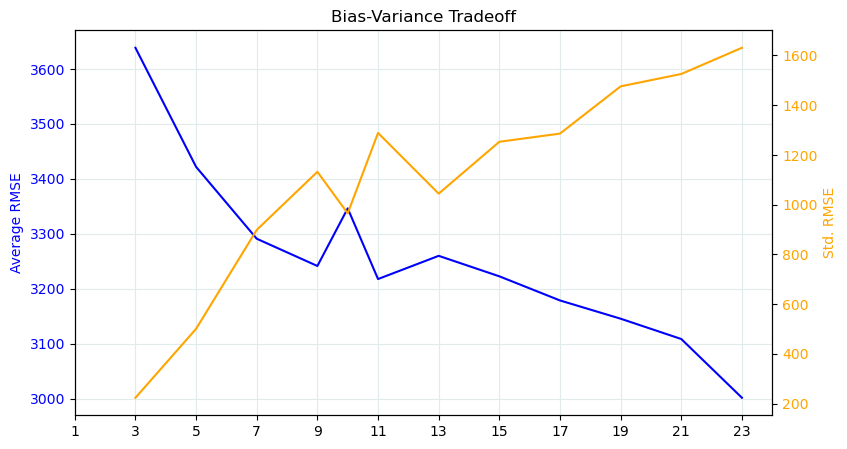

In [26]:
fif, ax = plt.subplots(figsize = (9,5))
ax.plot( num_folds, avg_rmse_list, color = 'blue')
ax.set_ylabel('Average RMSE', color='blue')
ax.tick_params(axis='y', labelcolor='blue')

ax2 = ax.twinx() # creating another y axis 
ax2.plot (num_folds, std_rmse_list, color = 'orange')  
ax2.set_ylabel('Std. RMSE', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

ax.grid(color = '#e0ebeb')
ax.set_xticks(np.arange(1, 25, 2))
plt.title("Bias-Variance Tradeoff")
plt.show()

# Conclusion

In this project we used KNN algorithm with univariate and multivariate models to predict a car's market price using its attributes. We applied holdout validation and k-fold cross-validation methods.

We can conclude that k-fold cross-validation allows for a more extensive utilization of the data during the training process, while it also efficiently cycles through various subsets of the data. This approach effectively helps in overcoming the limitations of train/test validation. 

As previously noted, the model's errors can be attributed to bias and variance. Supposing that only one feature, such as engine size, contributes to the car's price, may prompt us to fit simple univariate regression model, resulting in substantial bias. Obviously, the resulting error will be significant due to the impact of numerous other factors on the car's price, beyond just its engine.

On the other hand, if we were provided with a dataset containing an exceedingly large number of features for each car and utilized all of them to train a complex multivariate regression model, we would have low bias but high variance. Ideally, we aim for both bias and variance to be low, but there is always a tradeoff, as indicated by the schematic graph.

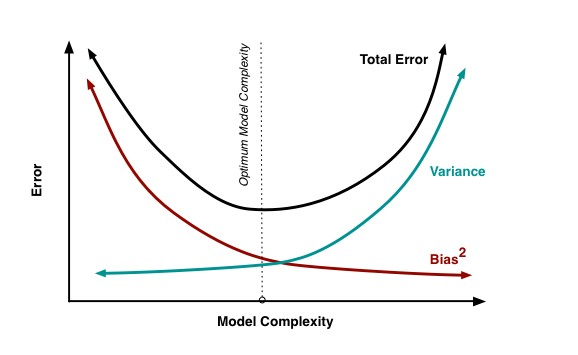

The standard deviation of the RMSE values might serve as an indicator of a model's variance, whereas the average RMSE might indicate a model's bias. 

In our case the graphs intersection is at 7 k folds using default k value. 
